In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import (about, basis, bloch_redfield_tensor, brmesolve, expect,
                   hinton, liouvillian, mesolve, plot_expectation_values,
                   sigmam, sigmax, sigmay, sigmaz, steadystate, anim_hinton)
# set a parameter to see animations in line
from matplotlib import rc
rc('animation', html='jshtml')

%matplotlib inline

In [3]:
epsilon = 0.5 * 2 * np.pi
gamma = 0.25
times = np.linspace(0, 10, 100)


In [4]:
# Setup Hamiltonian and initial state
H = epsilon / 2 * sigmaz()
psi0 = (2 * basis(2, 0) + basis(2, 1)).unit()

# Setup the master equation solver
c_ops = [np.sqrt(gamma) * sigmam()]
e_ops = [sigmax(), sigmay(), sigmaz()]
result_me = mesolve(H, psi0, times, c_ops, e_ops)

c:\Users\Tommy\OneDrive - Durham University\level 4 Project\L4 code directory\.venv\Lib\site-packages\qutip\solver\solver_base.py:583: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


In [19]:
a_op = [sigmax(), lambda w: gamma * (w > 0.0)]

In [20]:
result_brme = brmesolve(H, psi0, times, [a_op], e_ops)

# a_op is list of system operators that couple to bath of degrees of freedom

c:\Users\Tommy\OneDrive - Durham University\level 4 Project\L4 code directory\.venv\Lib\site-packages\qutip\solver\brmesolve.py:173: FutureWarning: c_ops, e_ops, args and options will be keyword only from qutip 5.3
  warnings.warn(


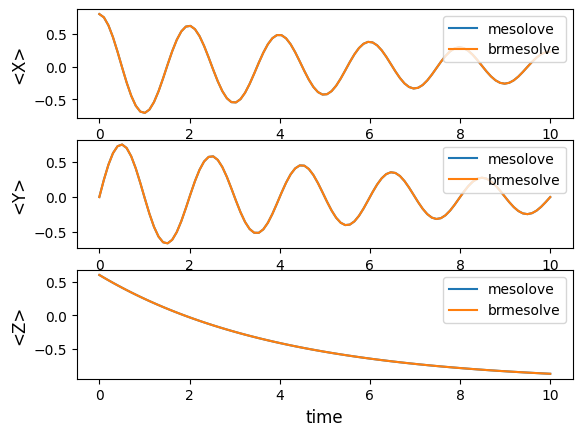

In [ ]:
fig, axes = plot_expectation_values(
    [result_me, result_brme], ylabels=["<X>", "<Y>", "<Z>"]
)
for ax in axes:
    ax.legend(['mesolove', 'brmesolve'], loc='upper right')

obtain density matrices at each defined time step
pass empty list at `e_ops` 
calculate exp values and obtain states pass `options={"store_states": True}

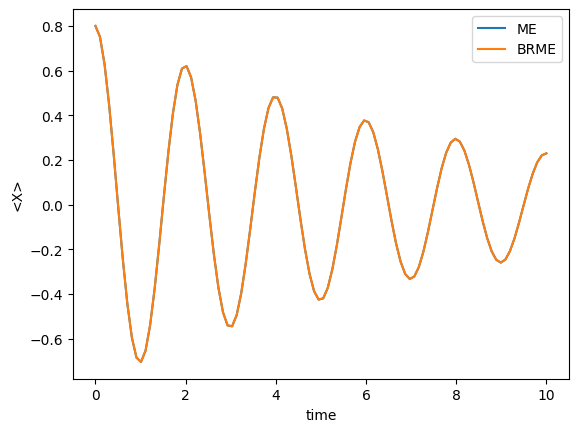

In [22]:
# run solvers without e_ops
me_s = mesolve(H, psi0, times, c_ops, e_ops=[])
brme_s = brmesolve(H, psi0, times, [a_op], e_ops=[])

# calculate expecation values
x_me = expect(sigmax(), me_s.states)
x_brme = expect(sigmax(), brme_s.states)

# plot the expectation values
plt.plot(times, x_me, label="ME")
plt.plot(times, x_brme, label="BRME")
plt.legend(), plt.xlabel("time"), plt.ylabel("<X>");

In [23]:
fig, ani = anim_hinton(me_s)
plt.close()
ani

Bloch-Redfield tensor
`qutip.bloch_redfield_tensor()`
pass Hamiltonian
pass dissipation description `a_ops`



Bloch-Redfield equation must be used with care as it doesn't guanrantee resulting master equation unconditionally preserves the physical properties of the density matrix (as it is a perturbative method)

In [24]:
R, H_ekets = bloch_redfield_tensor(H, [a_op])

# calculate lindblad liouvillian from H
L = liouvillian(H, c_ops)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0.]
 [0. 0.]]


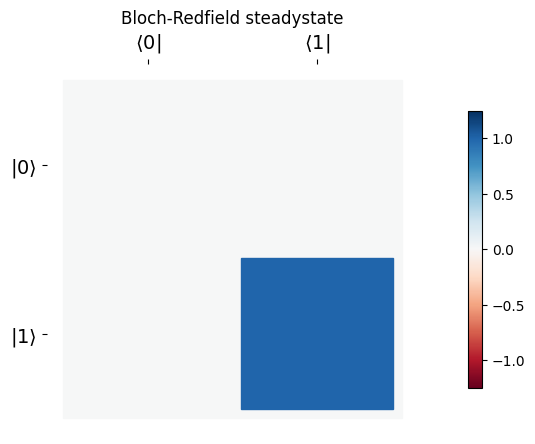

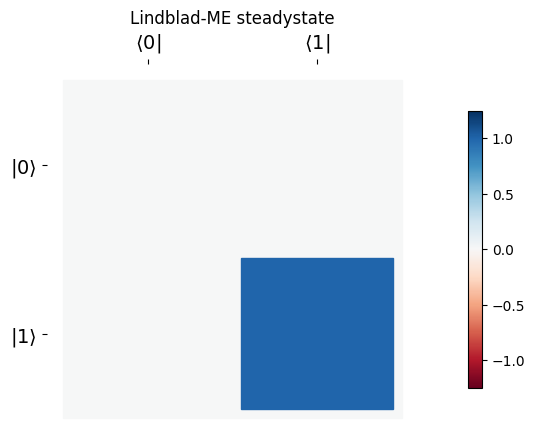

In [27]:
# Obtain steadystate from Bloch-Redfield Tensor
rhoss_br_eigenbasis = steadystate(R)
rhoss_br = rhoss_br_eigenbasis.transform(H_ekets, True)
print(rhoss_br_eigenbasis)
# Steadystate from Lindblad liouvillian
rhoss_me = steadystate(L)

# Plot the density matrices using a hinton plot
fig, ax = hinton(rhoss_br)
ax.set_title("Bloch-Redfield steadystate")
fig, ax = hinton(rhoss_me)
ax.set_title("Lindblad-ME steadystate");